In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import time

In [19]:
df  = pd.read_csv("boston.csv", index_col = 0)

In [20]:
# split into input and target variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X.shape

(506, 13)

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [23]:
class ANNRegressor:
    def __init__(self, n_input, n_hidden, n_output):
        self.weights1 = np.random.randn(n_input, n_hidden)
        self.bias1 = np.zeros((1, n_hidden))
        self.weights2 = np.random.randn(n_hidden, n_output)
        self.bias2 = np.zeros((1, n_output))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.y_pred = self.relu(self.z2)
        return self.y_pred

    def backward(self, X, y, y_pred, learning_rate):
        m = X.shape[0]
        error = y_pred - y
        delta2 = error
        d_weights2 = np.dot(self.a1.T, delta2)
        d_bias2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = np.dot(delta2, self.weights2.T) * self.a1 * (1 - self.a1)
        d_weights1 = np.dot(X.T, delta1)
        d_bias1 = np.sum(delta1, axis=0)

        # Update the weights and biases
        self.weights1 -= learning_rate * d_weights1 / m
        self.bias1 -= learning_rate * d_bias1 / m
        self.weights2 -= learning_rate * d_weights2 / m
        self.bias2 -= learning_rate * d_bias2 / m
        
    def train(self, X, y, n_epochs, learning_rate):
        start_time = time.time()  # Record start time
        for i in range(n_epochs):
            epoch_start_time = time.time()  # Record start time of epoch
            y_hat = self.forward(X)
            self.backward(X, y, y_hat, learning_rate)
            epoch_end_time = time.time()  # Record end time of epoch
            step_time = epoch_end_time - epoch_start_time  # Calculate step time    
        end_time = time.time()  # Record end time
        elapsed_time = end_time - start_time  # Calculate elapsed time
        print("Elapsed Time:", elapsed_time)

In [30]:
# Initialize the neural network with 13 input nodes, 5 hidden nodes, and 1 output node
n_input = X_train.shape[1]
n_hidden = 5
n_output = 1
nn = ANNRegressor(n_input, n_hidden, n_output)

# Train the neural network and evaluate its performance on the test set
learning_rate = 0.01
n_epochs = 1500

In [31]:
start_time = time.time()
nn.train(X_train, y_train, n_epochs, learning_rate)
end_time = time.time()

y_pred = nn.forward(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)



Elapsed Time: 0.334104061126709
Mean Squared Error: 14.17152086220796


In [32]:
score_manual = r2_score(y_test, y_pred)
score_manual

0.8119139279132723

# Hyper Parameter Tuning

In [33]:
# define the range of hyperparameters to search

import time

start_time = time.time()

n_hidden_list = [3, 5, 7]
learning_rate_list = [0.01, 0.05, 0.1]
epochs_list = [500, 1000, 1500]

# initialize variables to keep track of the best hyperparameters and performance
best_n_hidden = None
best_learning_rate = None
best_epochs = None
best_score = float('-inf')

# loop through all possible combinations of hyperparameters
for n_hidden in n_hidden_list:
    for learning_rate in learning_rate_list:
        for n_epochs in epochs_list:
        
        # initialize the neural network with the current hyperparameters
           nn = ANNRegressor(n_input, n_hidden, n_output)

        # train the neural network
        nn.train(X_train, y_train, n_epochs, learning_rate)

        # evaluate the performance on the test set
        y_pred = nn.forward(X_test)
        score = r2_score(y_test, y_pred)

        # check if the current hyperparameters are the best so far
        if score > best_score:
            best_score = score
            best_n_hidden = n_hidden
            best_learning_rate = learning_rate
            best_epochs = n_epochs

# print the best hyperparameters and performance
print("Best number of hidden nodes:", best_n_hidden)
print("Best learning rate:", best_learning_rate)
print("Best R2 score:", best_score)
print(f"Best number of epochs: {best_epochs}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.4f} seconds")

Elapsed Time: 0.46175193786621094
Elapsed Time: 0.3799867630004883
Elapsed Time: 0.40192413330078125
Elapsed Time: 0.40192556381225586
Elapsed Time: 0.3959388732910156
Elapsed Time: 0.5006599426269531
Elapsed Time: 0.45977067947387695
Elapsed Time: 0.48669934272766113
Elapsed Time: 0.48470187187194824
Best number of hidden nodes: 7
Best learning rate: 0.05
Best R2 score: 0.8565659277168707
Best number of epochs: 1500
Total time taken: 3.9943 seconds


# Using keras

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
# Define the neural network
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

In [36]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
n_epochs = 1500
start_time = time.time()
model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, verbose=0)
end_time = time.time()

In [38]:
# Predict on the test set and calculate the R2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Training time:", end_time - start_time, "seconds")
print("R2 score:", r2)


5/5 [==============================] - 0s 3ms/step
Training time: 39.38828206062317 seconds
R2 score: 0.8308310794885952


# Visualization

In [39]:
import matplotlib.pyplot as plt

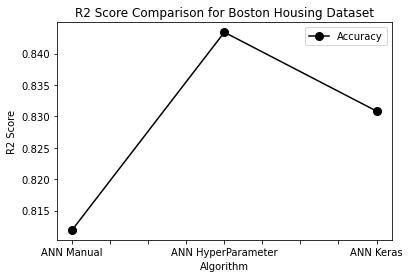

In [40]:
df = pd.DataFrame({'Algorithm': ['ANN Manual', 'ANN HyperParameter', 'ANN Keras'],
                   'Accuracy': [score_manual, score, r2]})
df['Accuracy'] = df['Accuracy'].astype(float)
fig, ax = plt.subplots()
df.plot('Algorithm', 'Accuracy', kind='line', ax=ax, color="black", marker='o', markersize=8)
plt.title('R2 Score Comparison for Boston Housing Dataset')
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.show()
